In [1]:
group_leader_id=1802451  # Insert your ID number here as a 7-digit integer
member_1_id=1802410  # Insert your ID number here as a 7-digit integer
member_2_id=1801655  # Insert your ID number here as a 7-digit integer

# If your group has 2 members, use the 2nd member's ID twice (lines 2 and 3)

def check_id_number(id_number):
    if isinstance(id_number, str):
        raise TypeError("Please provide the digits of your ID number only.")
    if len(str(id_number)) != 7:
        raise ValueError("Please provide the seven (7) digits of your ID number.")
    return

check_id_number(group_leader_id)
check_id_number(member_1_id)
check_id_number(member_2_id)

import numpy as np
import random
from copy import deepcopy
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image

def generate_target_image_matrix(filepath):
    '''
    Open the UTAR logo file (must be 300-by-150 in pixels) at `filepath` and
    chop it into 9 sub-images of equal size (leaving top-left empty). These
    sub-images are saved into a list of lists (representing 3-by-3 matrix).
    
    Note - Numpy nd-arrays aren't used because they cannot hold Images as
    elements.
    '''
    im = Image.open(filepath)
    images = np.zeros(shape=(3, 3))
    images = images.tolist()
    for r in range(3):
        for c in range(3):
            if r+c > 0:  # The top-left box is left empty to allow moving
                box = (c*100, r*50, (c+1)*100, (r+1)*50)
                images[r][c] = im.crop(box)
    return images

def display_single_image(images):
    '''
    Take the 3-by-3 'matrix' of images and display it as one image (with a
    2-pixel gap to indicate where the sub-images are). Does not return any
    value.
    
    Note - By definition for this puzzle there must always be an empty
    element in the 3-by-3 matrix.
    '''
    im = Image.new(mode='RGB', size=(304, 154), color=(255,255,255))
    for r in range(3):
        for c in range(3):
            if images[r][c]:  # Check if there's a sub-image here
                box = (c*102, r*52, c*102+100, r*52+50)
                im.paste(images[r][c], box)
    display(im)

def shift_image_matrix_once(images, loc=None):
    '''
    Take the 3-by-3 'matrix' of images and do one movement, returning
    the resulting 3-by-3 'matrix' of images. If `loc` is None (default)
    then this randomly chooses a valid movement.
    '''
    for r in range(3):
        for c in range(3):
            if not images[r][c]:  # Found the empty slot!
                empty_loc = (r, c)
                target_loc = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
    # target_loc lists the locations which are valid sub-images to be
    # moved into this empty slot (so -1 and 3 aren't valid coordinates)
    target_loc = [(r, c) for (r, c) in target_loc
                 if r > -1 and c > -1 and r < 3 and c < 3]
    if loc == None:  # Default behaviour, shift a random piece
        target_loc = random.choice(target_loc)
    else:  # Shift a given target to the empty location
        if loc in target_loc:
            target_loc = loc
        else:  # If an invalid loc is specified, return an error
            raise ValueError("The location '{}' is not adjacent to the empty location '{}'"
                            .format(loc, empty_loc))
    rO, cO = empty_loc
    rT, cT = target_loc
    images[rO][cO], images[rT][cT] = images[rT][cT], images[rO][cO]
    return images

def shuffle_image_matrix_n_times(images, n):
    '''
    Take the 3-by-3 'matrix' of images and a number n, which is the number of times
    to shuffle the puzzle. Returns the shuffled puzzle.
    '''
    for i in range(n):
        images = shift_image_matrix_once(images)
    return images

def apply_solution_to_image_matrix(images, solution):
    '''
    Apply a solution (formulated as a list of locations to move) to a 'matrix' of
    images. If the solution is correct, the resulting/returned 'matrix' should be
    identical to the target 'matrix', showing the UTAR logo.
    '''
    images = deepcopy(images)  # To allow multiple calls to this function
    for loc in solution:
        images = shift_image_matrix_once(images, loc=loc)
    return images

def pick_uninformed_search_method():
    l = ['Breadth-first Search',
         'Depth-first Search',
         'Bidirectional Search',
         'Uniform-cost Search',
         'Iterative Deepening']
    random.shuffle(l)
    return l[0], l[1]

'The target image'

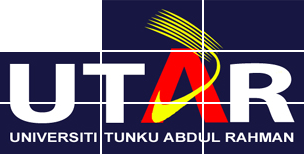

'Your randomly generated starting point'

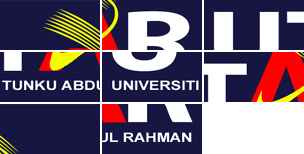

"Your randomly generated uninformed search methods are 'Breadth-first Search' and 'Depth-first Search'"

In [2]:
random.seed(group_leader_id)
images = generate_target_image_matrix('UTARLogo.png')
display("The target image")
display_single_image(images)
display("Your randomly generated starting point")
starting_point = shuffle_image_matrix_n_times(images, 1000)  # Do not change this number
display_single_image(starting_point)
random.seed(member_1_id*member_2_id)
display("Your randomly generated uninformed search methods are '{}' and '{}'".format(*pick_uninformed_search_method()))

'The result after applying the provided solution list'

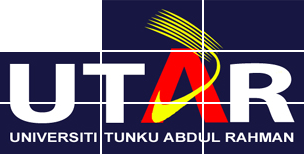

In [3]:
# When you have a solution, you can test it as below. The solution list is
# a consecutive list of positions which need to be shifted to the current empty
# slot. The solution shown below is the solution for the puzzle generated by
# the random seed 1234567.

# Do note that this cell and the student ID in cell 2 are the ONLY cells you are
# allowed to edit. Malicious edits for the purpose of creating a fake solution
# will be treated as disciplinary offenses.

# solution = [(1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1),
#            (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (2, 1), (2, 0), (1, 0), (0, 0)]

solution = [(2, 1),(2,0),(1,0),(1,1),(2,1),(2,2),(1,2),(0,2),(0,1),(1,1),
            (1,2),(2,2),(2,1),(2,0),(1,0),(1,1),(1,2),(0,2),(0,1),(0,0)]
display('The result after applying the provided solution list')
display_single_image(apply_solution_to_image_matrix(starting_point, solution))

'The steps used to solve [(1, 2), (0, 2), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1)

'The number of steps used to solve 224'

'The result after applying the board game style dfs'

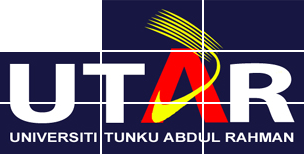

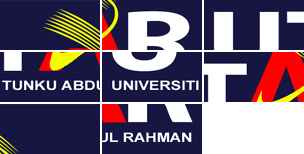

'The steps used to solve [(2, 1), (2, 0), (1, 0), (1, 1), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 2), (0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 2), (0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 1), (1, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]'

'The number of steps used to solve 60'

'The result after applying the conventional dfs'

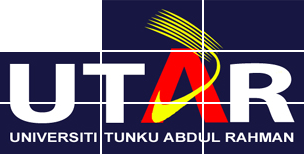

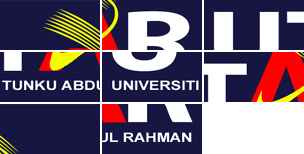

'The steps used to solve [(2, 1), (1, 1), (1, 0), (2, 0), (2, 1), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (1, 2), (1, 1), (0, 1), (0, 0)]'

'The number of steps used to solve 22'

'The result after applying the conventional bfs'

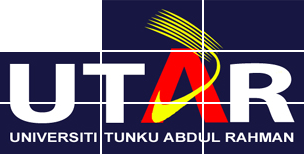

In [4]:
import collections
from itertools import chain
from typing import Set, List, Tuple

def randomised_array():
    random.seed(group_leader_id)
    arr: List[List[int]] = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
    return shuffle_image_matrix_n_times(arr, 1000)

def flatten_two_d_arr_to_one_d(arr: List[List[int]]) -> List[int]:
    return list(chain.from_iterable(arr))


def exclusion(index: int, move: int) -> bool:
    right_column_exclusion: List[int] = [2, 5, 8]
    left_column_exclusion: List[int] = [0, 3, 6]

    if index + move < 0 or index + move > 8:
        return True

    if index in left_column_exclusion and move == -1:
        return True

    if index in right_column_exclusion and move == 1:
        return True

    return False


def index_of_zero(arr: list) -> int:
    return arr.index(0)


def inplace(arr: list, move: int, index: int) -> bool:
    temp_index = index + move
    return arr[temp_index] == temp_index


def generate_move(arr: list) -> List[int]:
    move_vector: List[int] = [-3, -1, 1, 3]
    index: int = index_of_zero(arr)

    return list(
        filter(
            lambda move: (not exclusion(index, move) and not inplace(arr, move, index)), move_vector
        )
    )


def execute_move(arr: list, move: int, index: int) -> List[int]:
    copy_arr: List[int] = deepcopy(arr)

    destination_index: int = index + move

    destination_index_value: int = copy_arr[destination_index]
    copy_arr[destination_index] = 0
    copy_arr[index] = destination_index_value

    return copy_arr


def generate_new_state_collection(arr: list) -> List[List[int]]:
    index: int = index_of_zero(arr)

    return list(
        map(
            lambda move: execute_move(arr, move, index), generate_move(arr)
        )
    )


class Node:
    def __init__(self, state: list, parent):
        self.state: List[int] = state
        self.parent: Node or None = parent
        self.string_representation_of_state: str = ''.join(str(e) for e in self.state)


def conventional_bfs(start_state: list) -> Node or None:
    goal_state: List[int] = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    explored: Set[str] = set()
    queue: collections.deque[Node] = collections.deque([Node(start_state, None)])

    while queue:

        current_node: Node = queue.popleft()

        explored.add(current_node.string_representation_of_state)

        if current_node.state == goal_state:
            return current_node

        states = generate_new_state_collection(current_node.state)

        for state in states:
            node = Node(state, current_node)
            if node.string_representation_of_state not in explored:
                queue.append(node)
                explored.add(node.string_representation_of_state)


def conventional_dfs(start_state) -> Node or None:
    goal_state: List[int] = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    explored: Set[str] = set()
    stack: List[Node] = list([Node(start_state, None)])

    while stack:

        current_node: Node = stack.pop()

        explored.add(current_node.string_representation_of_state)

        if current_node.state == goal_state:
            return current_node

        states = generate_new_state_collection(current_node.state)

        for state in states:
            node = Node(state, current_node)
            if node.string_representation_of_state not in explored:
                stack.append(node)
                explored.add(node.string_representation_of_state)


def game_dfs(current_node: Node, states_list: list) -> Node or None:
    if current_node.state == [0, 1, 2, 3, 4, 5, 6, 7, 8]:
        return current_node

    states: List[List[int]] = generate_new_state_collection(current_node.state)

    for state in states:
        node = Node(state, current_node)
        if node.string_representation_of_state in states_list:
            continue

        states_list.append(node.string_representation_of_state)
        latest_node: Node or None = game_dfs(node, states_list)
        if latest_node is not None:
            return latest_node

        states_list.pop()

    return None


def transform_node_to_linked_list(linked_list: list, node: Node or None) -> List[List[int]]:
    if node is None:
        raise Exception('Hey, nice work but node is None, so the solution is faulty')
    if node.parent is None:
        return linked_list
    linked_list.append(node.state)
    return transform_node_to_linked_list(linked_list, node.parent)


def transform_one_d_index_to_two_d_index(index: int) -> Tuple[int, int]:
    return int(index / 3), int(index % 3)


def transform_linked_list_to_solution(linked_list: list) -> List[Tuple[int, int]]:
    return list(
        map(
            lambda state: transform_one_d_index_to_two_d_index(index_of_zero(state)), reversed(linked_list)
        )
    )

def test_algorithm(linked_list: list, randomise:bool, solution:str):
    if randomise:
        read_img = generate_target_image_matrix('UTARLogo.png')
        random.seed(group_leader_id)
        display_single_image(shuffle_image_matrix_n_times(read_img, 1000))
    display('The steps used to solve ' + str(linked_list))
    display('The number of steps used to solve ' + str(len(linked_list)))
    display('The result after applying the ' + solution)
    display_single_image(apply_solution_to_image_matrix(starting_point, linked_list))

def test_all_algorithm():
    flatten_arr: List[int] = flatten_two_d_arr_to_one_d(randomised_array())
    game_style_dfs: List[Tuple[int, int]] = transform_linked_list_to_solution(transform_node_to_linked_list([], game_dfs(Node(flatten_arr, None), [])))
    convention_dfs: List[Tuple[int, int]] = transform_linked_list_to_solution(transform_node_to_linked_list([], conventional_dfs(flatten_arr)))
    convention_bfs: List[Tuple[int, int]] = transform_linked_list_to_solution(transform_node_to_linked_list([], conventional_bfs(flatten_arr)))

    test_algorithm(game_style_dfs, False, 'board game style dfs')
    test_algorithm(convention_dfs, True, 'conventional dfs')
    test_algorithm(convention_bfs, True, 'conventional bfs')

test_all_algorithm()

